In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=25)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
data = pd.read_excel('Our Bank customer data_edited.xlsx')
print(data.shape)
print(list(data.columns))

(10127, 22)
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_code']


In [3]:
count_attrited = len(data[data['Attrition_code']== 1 ])
count_existing = len(data[data['Attrition_code']==0 ])
pct_of_attrited = count_attrited/(count_attrited+count_existing)
print("percentage of attrition is", pct_of_attrited*100)
pct_of_existing = count_existing/(count_attrited+count_existing)
print("percentage of existing", pct_of_existing*100)

percentage of attrition is 16.065962279055988
percentage of existing 83.934037720944


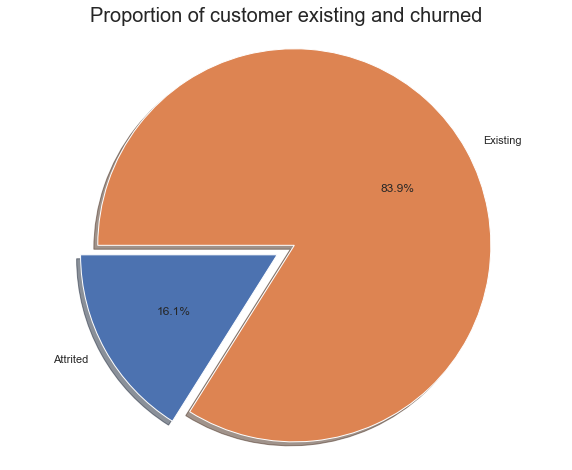

In [17]:
labels = 'Attrited','Existing'
sizes = [data.Attrition_code[data['Attrition_code']==1].count(), data.Attrition_code[data['Attrition_code']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Proportion of customer existing and churned", size = 20)
plt.show()

In [4]:
data.groupby('Gender').mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_code
Gender,,,,,,,,,,,,,,,,
F,7.384748e+08,46.456887,2.340612,35.979097,3.807951,2.351810,2.413587,5023.854274,1140.011198,3883.843076,0.754417,4324.318216,66.352370,0.713525,0.341957,0.173572
M,7.399673e+08,46.178863,2.352485,35.871462,3.817782,2.329209,2.502202,12685.674963,1188.433215,11497.241749,0.766147,4493.706228,63.180541,0.710759,0.199548,0.146152


In [5]:
data.groupby('Income_Category').mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_code
Income_Category,,,,,,,,,,,,,,,,
$120K +,7.398472e+08,47.603851,2.462173,36.891334,3.778542,2.331499,2.537827,19717.322558,1222.196699,18495.125860,0.752459,4529.467675,63.704264,0.688702,0.125307,0.173315
$40K - $60K,7.406596e+08,46.087151,2.308380,35.873184,3.783240,2.294413,2.460894,5462.259832,1171.994413,4290.265419,0.759531,4405.618994,65.000559,0.711113,0.316561,0.151397
$60K - $80K,7.392427e+08,45.968616,2.440086,35.597004,3.833809,2.329529,2.455777,10758.772967,1154.993581,9603.779387,0.772189,4450.712553,63.247504,0.720776,0.206075,0.134807
$80K - $120K,7.408998e+08,46.428013,2.492508,36.074267,3.816938,2.327036,2.485342,15809.890945,1206.727036,14603.163909,0.766633,4482.960261,62.696417,0.713868,0.161664,0.157655
Less than $40K,7.380269e+08,46.297950,2.263690,35.881775,3.823364,2.367032,2.420388,3754.404521,1145.136759,2609.267762,0.752417,4363.420107,66.154732,0.711770,0.377280,0.171862
Unknown,7.375797e+08,46.274281,2.275180,35.753597,3.814748,2.374101,2.462230,9516.582464,1115.064748,8401.517716,0.764903,4282.211331,66.250899,0.717778,0.220810,0.168165


In [6]:
data.groupby('Dependent_count').mean()

,CLIENTNUM,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_code
Dependent_count,,,,,,,,,,,,,,,
0,7.388813e+08,48.326327,37.658186,3.951327,2.332965,2.561947,7160.763717,1146.824115,6013.939602,0.775296,4110.331858,61.711283,0.711486,0.294683,0.149336
1,7.380434e+08,47.705658,37.026659,3.880849,2.372144,2.503808,7905.123449,1199.165397,6705.958052,0.773307,4411.088139,64.054407,0.708548,0.295280,0.146355
2,7.397155e+08,46.291902,35.918267,3.798493,2.332957,2.440678,8717.175292,1150.825612,7566.349680,0.756367,4475.953296,65.430132,0.715064,0.270859,0.157062
3,7.396807e+08,45.513543,35.281845,3.780015,2.345900,2.451684,8976.506589,1149.539531,7826.967057,0.753557,4309.106515,64.628843,0.705321,0.263641,0.176428
4,7.387695e+08,45.319568,35.005083,3.787166,2.336086,2.383736,9454.955019,1163.992376,8290.962643,0.758571,4469.992376,65.770013,0.719022,0.267874,0.165184
5,7.396312e+08,45.264151,35.136792,3.613208,2.264151,2.398585,9110.453302,1195.554245,7914.899057,0.737854,4917.356132,69.575472,0.731156,0.268158,0.150943


In [7]:
data.groupby('Education_Level').mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_code
Education_Level,,,,,,,,,,,,,,,,
College,7.411728e+08,45.970385,2.359329,35.682132,3.749260,2.353406,2.425469,8684.536130,1135.783810,7548.752320,0.764443,4255.806515,65.016782,0.714878,0.265399,0.152024
Doctorate,7.374008e+08,47.261641,2.325942,36.820399,3.747228,2.352550,2.450111,8413.258980,1094.084257,7319.174723,0.741044,4193.015521,63.784922,0.692656,0.260619,0.210643
Graduate,7.389346e+08,46.323529,2.347506,35.970588,3.825128,2.350064,2.459719,8566.100927,1162.380115,7403.720812,0.757418,4418.491368,64.883312,0.710724,0.277719,0.155691
High School,7.390476e+08,46.345256,2.311972,35.970691,3.807253,2.329856,2.446597,8605.823547,1194.353204,7411.470343,0.762508,4403.740189,64.692996,0.714512,0.278275,0.152012
Post-Graduate,7.389134e+08,45.562016,2.399225,35.352713,3.893411,2.313953,2.422481,8862.560465,1187.674419,7674.886047,0.767705,4515.414729,65.000000,0.702709,0.280572,0.178295
Uneducated,7.382206e+08,46.423672,2.353060,35.949563,3.843309,2.365837,2.488904,8899.509011,1154.079354,7745.429657,0.760446,4484.340955,65.315400,0.719299,0.271590,0.159381
Unknown,7.400740e+08,46.428571,2.361422,35.859776,3.797893,2.311389,2.457538,8491.798947,1160.449638,7331.349309,0.761209,4420.053325,64.745885,0.712616,0.276469,0.168532


In [8]:
data.groupby('Marital_Status').mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_code
Marital_Status,,,,,,,,,,,,,,,,
Divorced,7.408766e+08,45.116310,2.377005,35.145722,3.863636,2.347594,2.422460,9358.565107,1155.981283,8202.583824,0.755584,4529.090909,66.925134,0.702525,0.256947,0.161765
Married,7.390533e+08,46.735012,2.366332,36.213996,3.841050,2.333476,2.457222,8076.661895,1197.163644,6879.498250,0.772312,4173.417965,61.725411,0.715721,0.289650,0.151269
Single,7.387359e+08,46.213036,2.279990,35.877758,3.778849,2.352523,2.466396,8999.684758,1124.241441,7875.443317,0.748048,4594.554400,67.756531,0.709308,0.264366,0.169414
Unknown,7.405841e+08,45.568758,2.538051,35.189586,3.761015,2.323097,2.417891,9445.283178,1157.748999,8287.534179,0.749482,4720.005340,67.146862,0.715356,0.255899,0.172230


In [9]:
data.groupby('Card_Category').mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_code
Card_Category,,,,,,,,,,,,,,,,
Blue,7.391203e+08,46.372404,2.336477,35.960682,3.848665,2.345697,2.455596,7363.780002,1157.812209,6205.967794,0.759602,4225.406740,64.028190,0.712572,0.290859,0.160979
Gold,7.381368e+08,45.439655,2.672414,35.525862,3.008621,2.310345,2.448276,28416.370690,1344.318966,27072.051724,0.772603,7685.612069,81.517241,0.706190,0.057103,0.181034
Platinum,7.351706e+08,47.500000,2.450000,36.250000,2.300000,2.250000,2.500000,30283.450000,1267.950000,29015.500000,0.780100,8999.750000,86.950000,0.666200,0.043650,0.250000
Silver,7.405147e+08,45.679279,2.439640,35.452252,3.421622,2.273874,2.450450,25277.836036,1206.129730,24071.706306,0.762326,6590.482883,74.700901,0.709191,0.057310,0.147748


Text(0, 0.5, 'Frequency of Attrition')

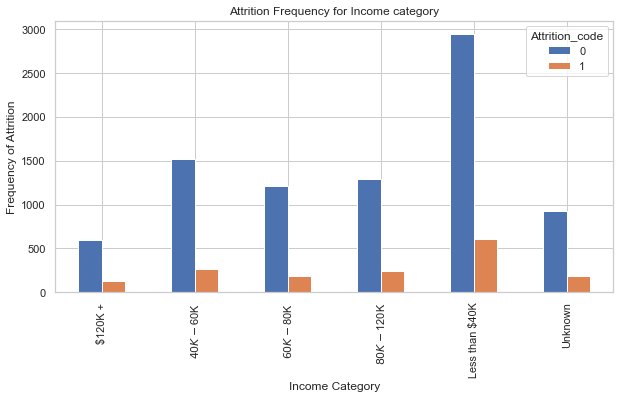

In [48]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]
pd.crosstab(data.Income_Category,data.Attrition_code).plot(kind='bar')
plt.title('Attrition Frequency for Income category')
plt.xlabel('Income Category')
plt.ylabel('Frequency of Attrition')
# plt.savefig('purchase_fre_job')

Text(0, 0.5, 'Frequency')

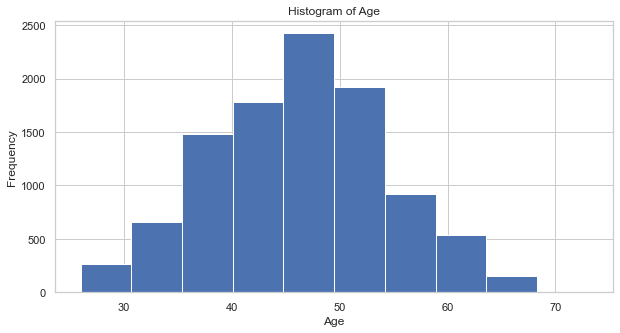

In [47]:
plt.rcParams["figure.figsize"] = [10, 5]
data.Customer_Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('hist_age')

Text(0, 0.5, 'Frequency of Attrition')

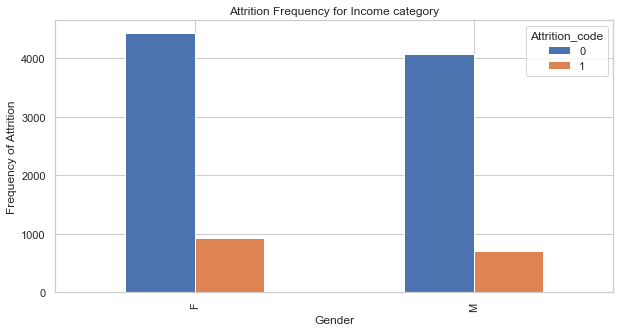

In [46]:
plt.rcParams["figure.figsize"] = [10, 5]
pd.crosstab(data.Gender,data.Attrition_code).plot(kind='bar')
plt.title('Attrition Frequency for Income category')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

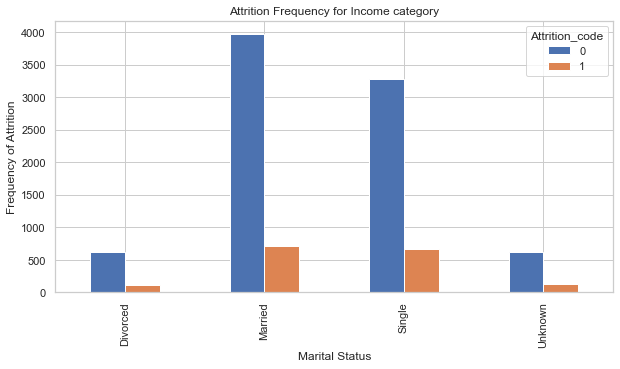

In [45]:
plt.rcParams["figure.figsize"] = [10, 5]
pd.crosstab(data.Marital_Status,data.Attrition_code).plot(kind='bar')
plt.title('Attrition Frequency for Income category')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

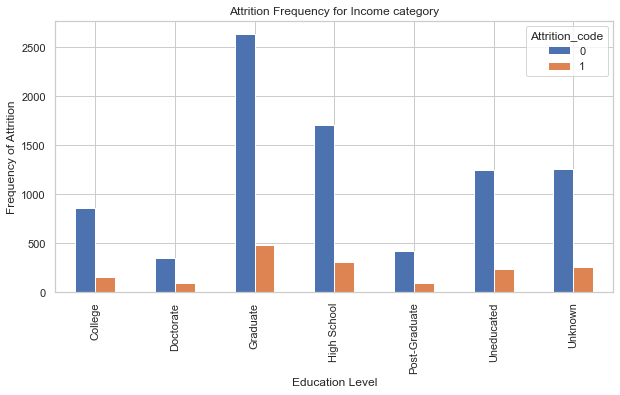

In [44]:
plt.rcParams["figure.figsize"] = [10, 5]
pd.crosstab(data.Education_Level,data.Attrition_code).plot(kind='bar')
plt.title('Attrition Frequency for Income category')
plt.xlabel('Education Level')
plt.ylabel('Frequency of Attrition')

Text(0, 0.5, 'Frequency of Attrition')

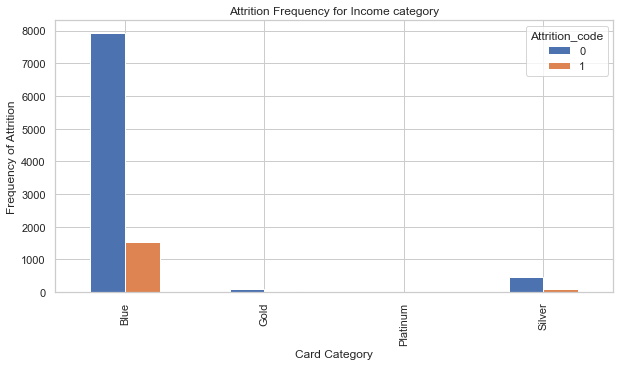

In [43]:
plt.rcParams["figure.figsize"] = [10, 5]
pd.crosstab(data.Card_Category,data.Attrition_code).plot(kind='bar')
plt.title('Attrition Frequency for Income category')
plt.xlabel('Card Category')
plt.ylabel('Frequency of Attrition')

<AxesSubplot:xlabel='Months_on_book', ylabel='CLIENTNUM'>

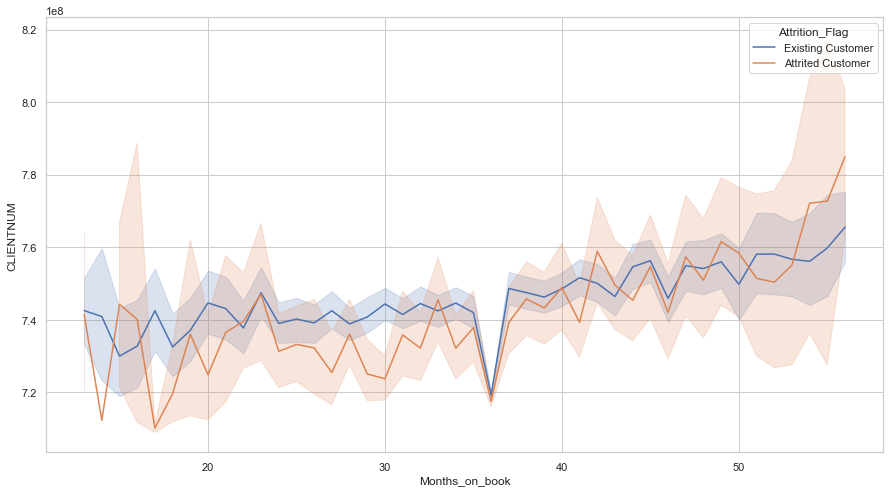

In [39]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_on_book",y="CLIENTNUM",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='CLIENTNUM'>

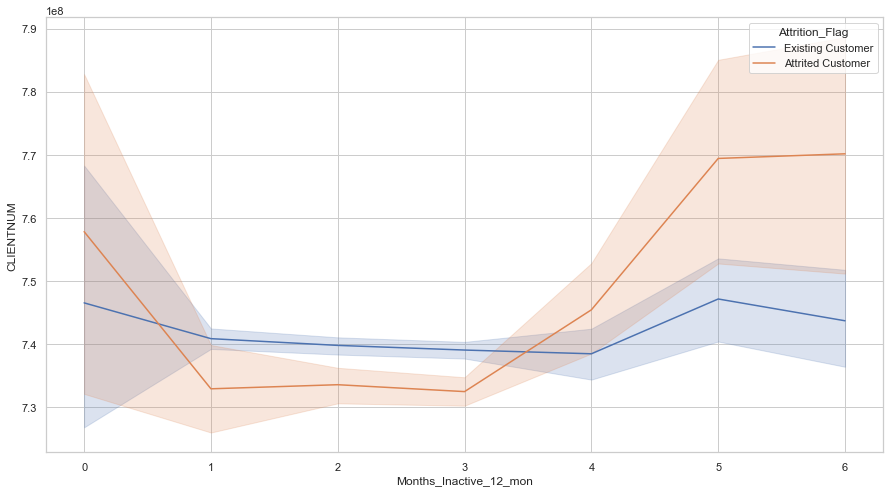

In [40]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_Inactive_12_mon",y="CLIENTNUM",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_on_book', ylabel='Total_Relationship_Count'>

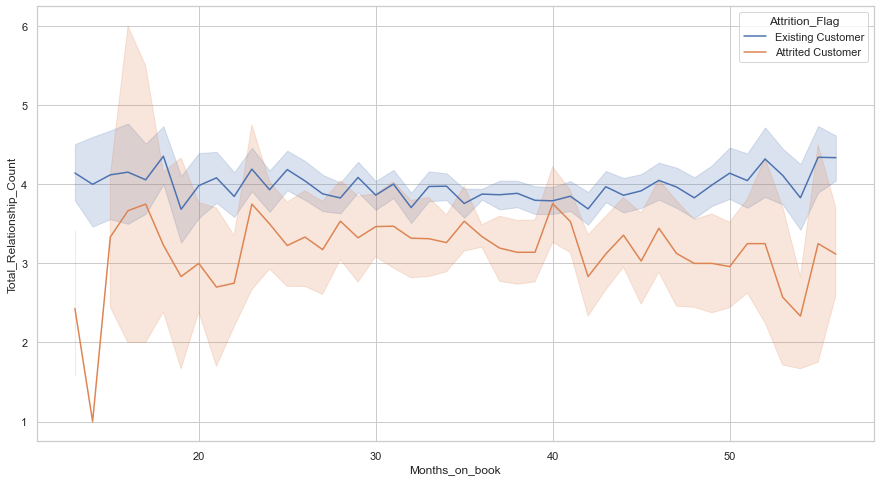

In [50]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_on_book",y="Total_Relationship_Count",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_on_book', ylabel='Credit_Limit'>

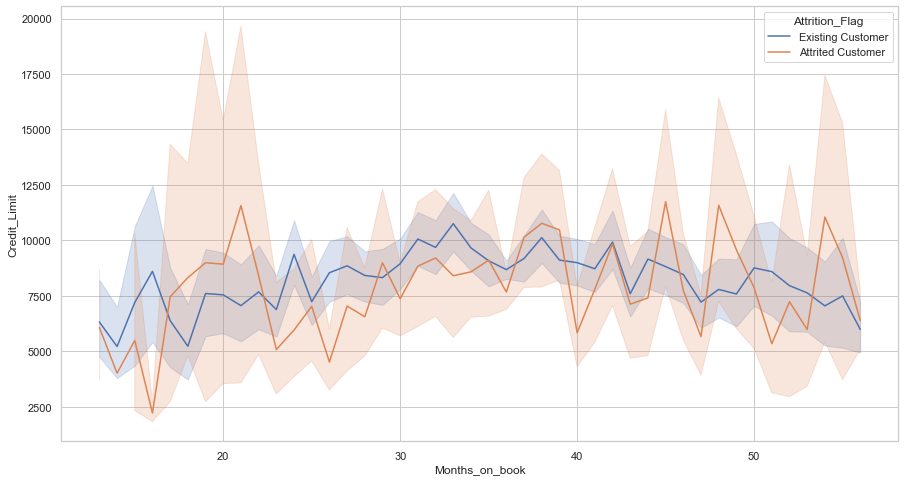

In [51]:

plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_on_book",y="Credit_Limit",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Credit_Limit'>

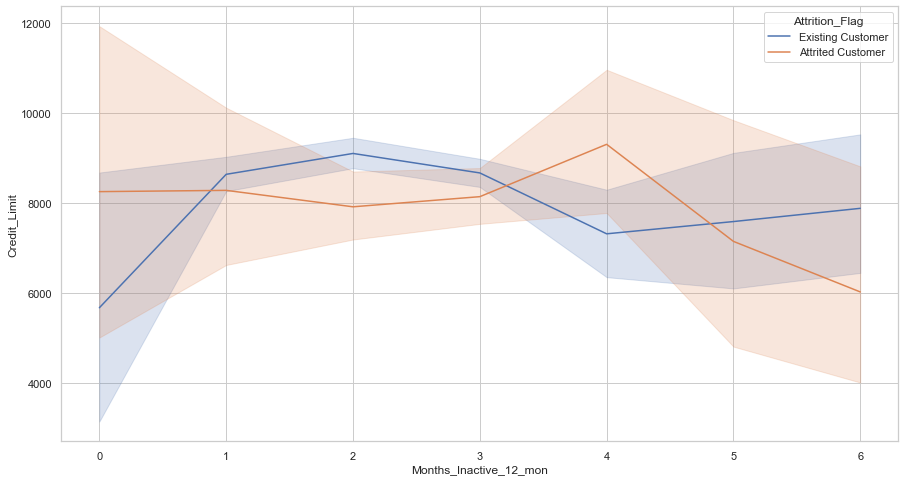

In [52]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_Inactive_12_mon",y="Credit_Limit",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Total_Revolving_Bal'>

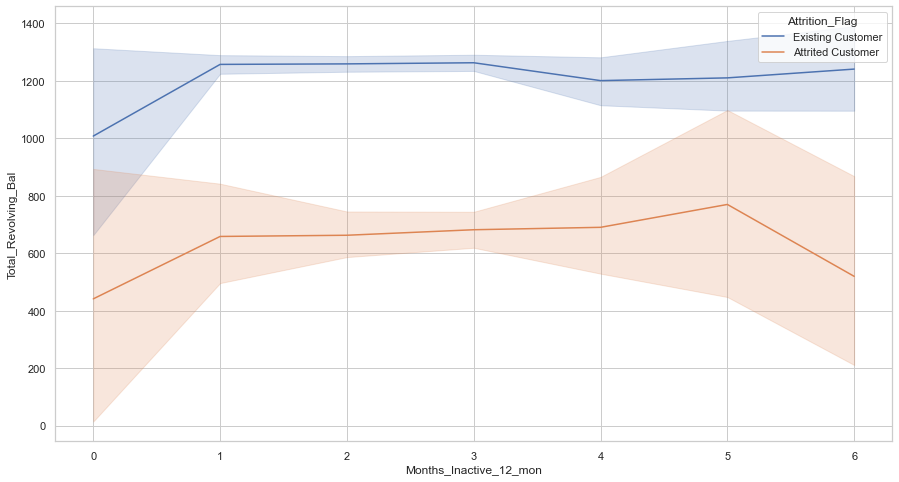

In [53]:

plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_Inactive_12_mon",y="Total_Revolving_Bal",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Avg_Open_To_Buy'>

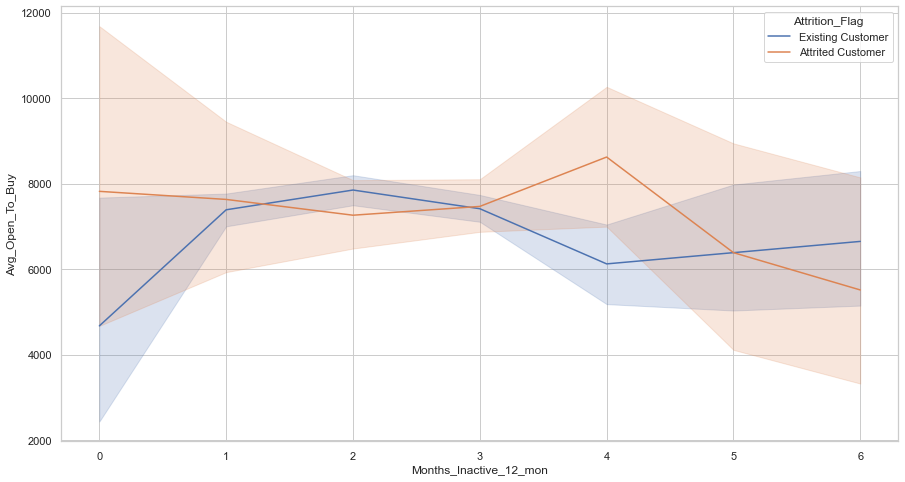

In [54]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_Inactive_12_mon",y="Avg_Open_To_Buy",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_on_book', ylabel='Avg_Utilization_Ratio'>

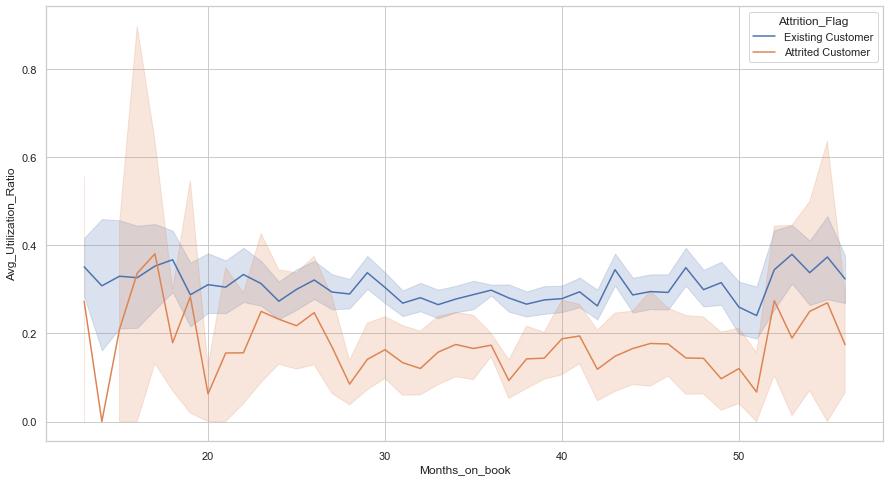

In [56]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_on_book",y="Avg_Utilization_Ratio",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_on_book', ylabel='Total_Trans_Ct'>

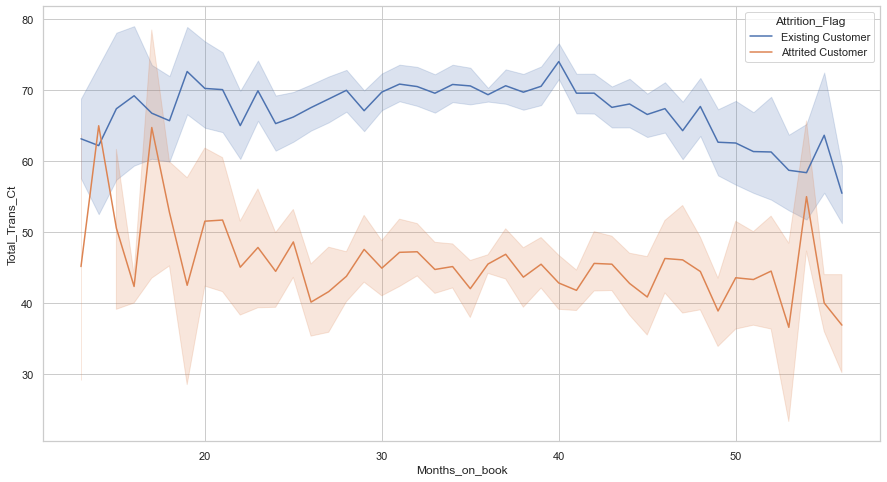

In [57]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_on_book",y="Total_Trans_Ct",hue="Attrition_Flag")

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

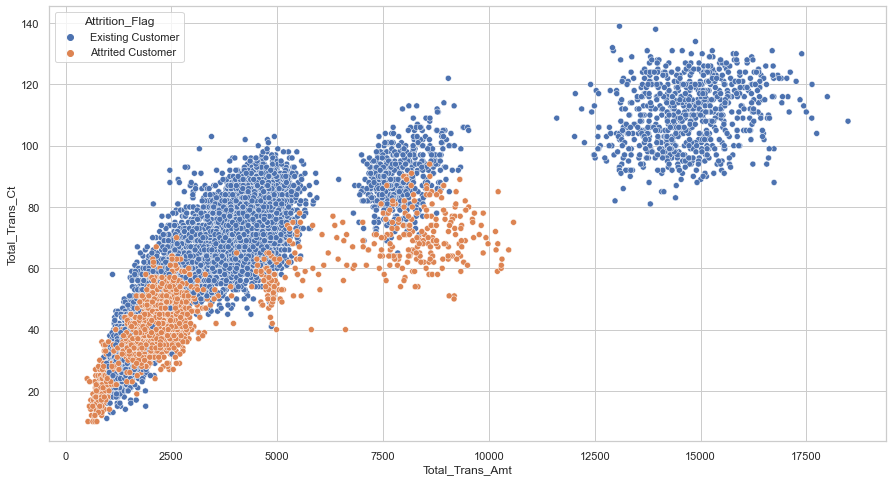

In [5]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x="Total_Trans_Amt",y="Total_Trans_Ct",hue="Attrition_Flag")

Text(0, 0.5, 'Total_Relationship_Count')

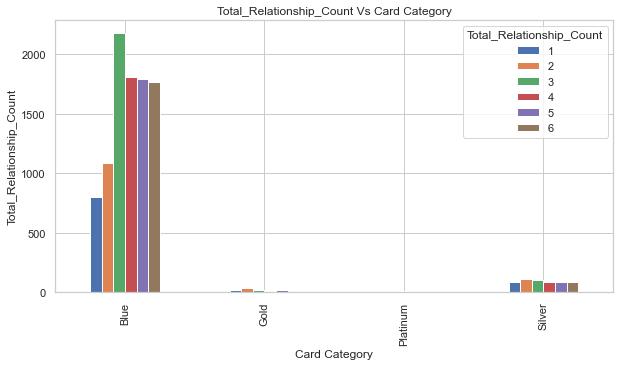

In [55]:
plt.rcParams["figure.figsize"] = [10, 5]
pd.crosstab(data.Card_Category,data.Total_Relationship_Count).plot(kind='bar')
plt.title('Total_Relationship_Count Vs Card Category')
plt.xlabel('Card Category')
plt.ylabel('Total_Relationship_Count')

<AxesSubplot:xlabel='Months_on_book', ylabel='Avg_Utilization_Ratio'>

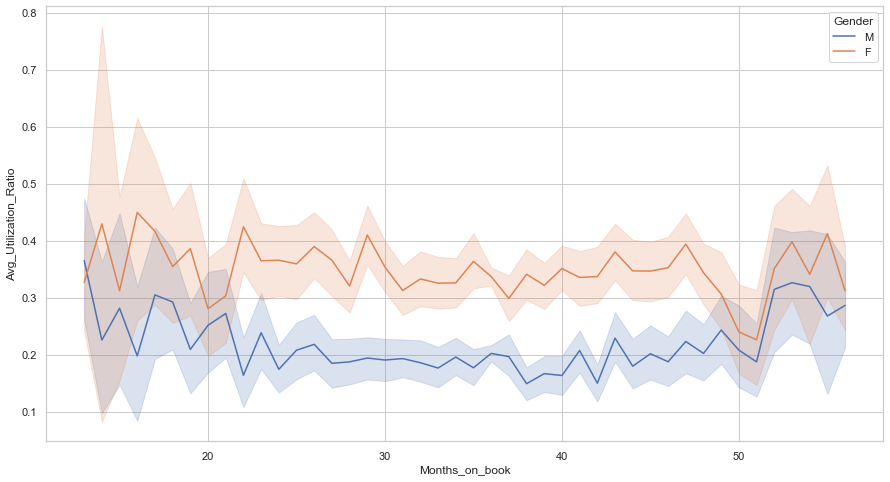

In [4]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_on_book",y="Avg_Utilization_Ratio",hue="Gender")

In [9]:
creditscore_df =pd.read_excel('creditscore_python_hist.xlsx')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

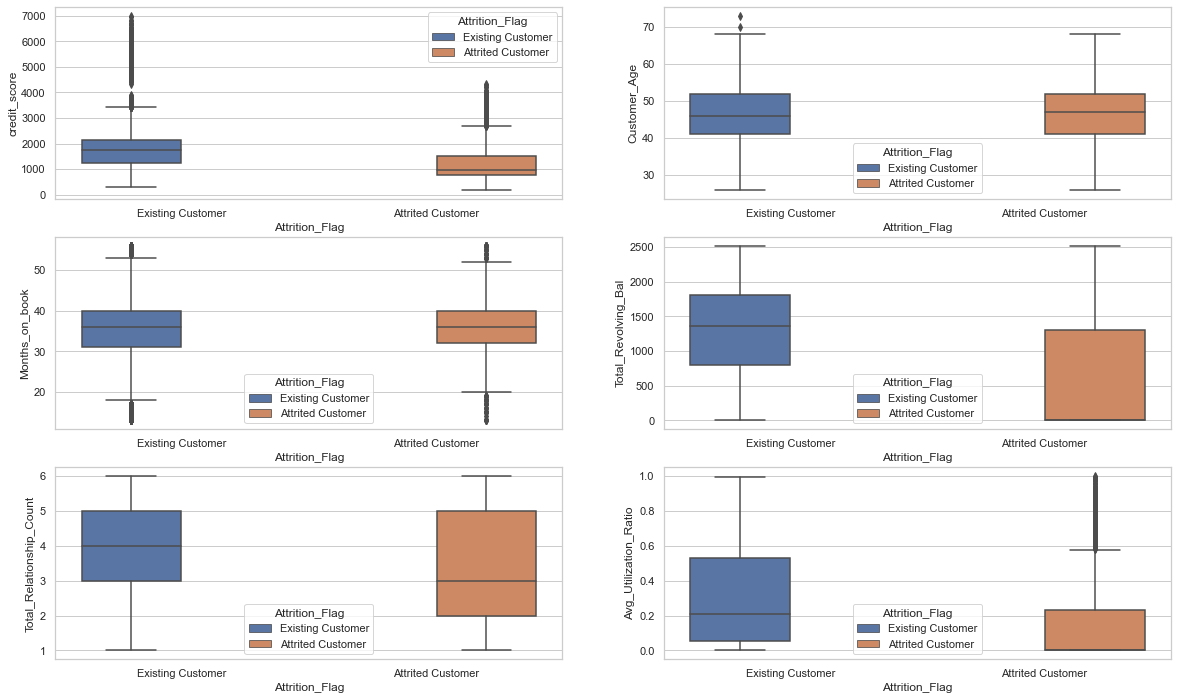

In [15]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = creditscore_df, ax=axarr[0][0])
sns.boxplot(y='Customer_Age',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = creditscore_df , ax=axarr[0][1])
sns.boxplot(y='Months_on_book',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = creditscore_df, ax=axarr[1][0])
sns.boxplot(y='Total_Revolving_Bal',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = creditscore_df, ax=axarr[1][1])
sns.boxplot(y='Total_Relationship_Count',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = creditscore_df, ax=axarr[2][0])
sns.boxplot(y='Avg_Utilization_Ratio',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = creditscore_df, ax=axarr[2][1])
    

1. Existing customers have higher credit score rating than the attrited customers, but the difference is not very evident.
2. There is no significant difference in the customer age distribution between existing and attrited customers.
3. The months on books boxplot is slightly thicker for existing customers than when compared to attrited customers which means existing customers have had longer relationship with the bank as compared to the attrited ones.
4. The customers who attrited the bank had a maximum of about $1400 as their balance. This means customers who have left the bank did not did not default with the bank but must have been unsatisfied with the Our Bank's Customer Services.
5. Surprisingly, customers owning more products with the bank have attrited. The bank may need to review their products here.
6. The average utilization ratio of existing customers is almost double that of attrited customers. This means attrited customers had less transaction ratio (less amount transacted with the bank)


Now doing a exploratory data analysis from the above two box plots and the below line graph, we find that around the period of 34-35 months, customers have had lower relationship count than when compared to the rest of the months. 
This could be some scheme that the bank had come up with 34-35 months earlier, that in order to attract customers had come up like say low credit card interest rates or a customer attractive scheme that was valid for a period of duration 34-35 months, that made the customers to sign up for credit cards with the bank but later after the scheme ended the customers also attrited from the bank. This is one analysis.

<AxesSubplot:xlabel='Months_on_book', ylabel='Total_Relationship_Count'>

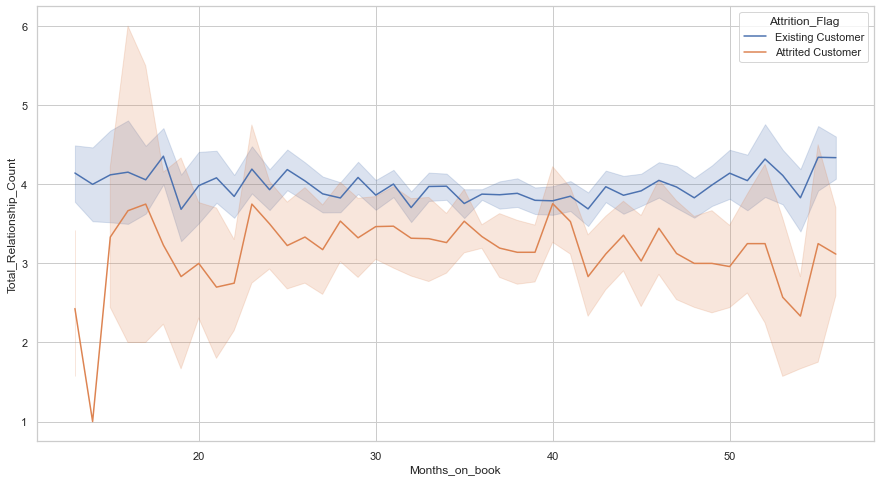

In [23]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_on_book",y="Total_Relationship_Count",hue="Attrition_Flag")

<AxesSubplot:xlabel='Months_on_book', ylabel='Total_Relationship_Count'>

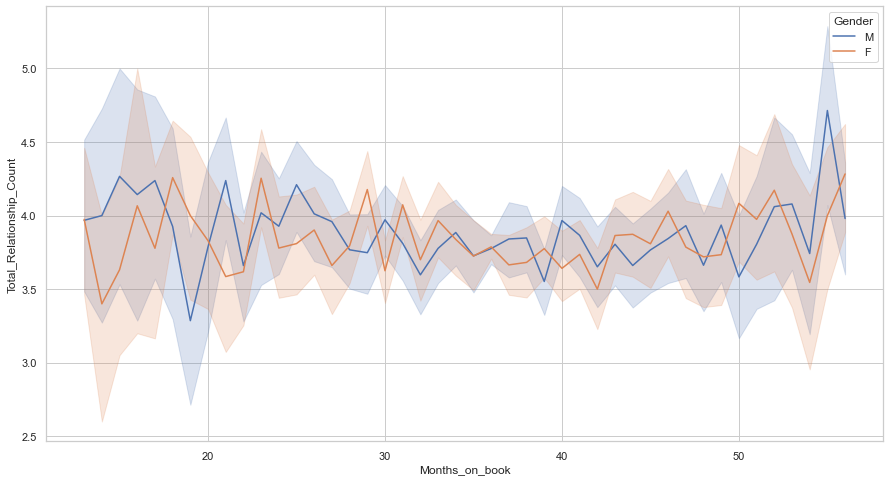

In [24]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,x="Months_on_book",y="Total_Relationship_Count",hue="Gender")

In [ ]:
# RANDOM_SEED = 10
# logmodel = LogisticRegression(class_weight='balanced',random_state = RANDOM_SEED)

In [ ]:
logmodel.fit(x, y)

In [ ]:
# data_final['predicted_attrition'] = logmodel.predict(x)

In [ ]:
data_final.to_csv('final_predicted_data_swathi.csv', header=True, index=False)

In [ ]:
data_final['predicted_attrition'].value_counts()

In [ ]:
logreg.score(x,y)